In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import tarfile
import seaborn as sns 
import json
# Load the TSV file into a DataFrame
tsv_file_path = "data/MovieSummaries/movie.metadata.tsv"
df_movies = pd.read_csv(tsv_file_path, sep='\t')
new_column_names = [
    'WikipediaMovieID',
    'FreebaseMovieID',
    'MovieName',
    'MovieReleaseDate',
    'MovieBoxOfficeRevenue',
    'MovieRuntime',
    'MovieLanguages',
    'MovieCountries',
    'MovieGenres'
]

df_movies.columns = new_column_names

def get_first(mapping):
    mapping = json.loads(mapping)
    if mapping:
        return next(iter(mapping.values()))
    return None

def replace(text):
    return str(text).replace(" Language", "").replace(" language", "")
 
# Apply the function to get the first country name
df_movies['MovieCountries']= df_movies['MovieCountries'].apply(get_first)
df_movies['MovieLanguages']= df_movies['MovieLanguages'].apply(get_first)
df_movies['MovieLanguages']= df_movies['MovieLanguages'].apply(replace)

df_movies['MovieGenres']= df_movies['MovieGenres'].apply(get_first)

# Show the DataFrame

df_movies

,WikipediaMovieID,FreebaseMovieID,MovieName,MovieReleaseDate,MovieBoxOfficeRevenue,MovieRuntime,MovieLanguages,MovieCountries,MovieGenres
0,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,English,United States of America,Mystery
1,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,Norwegian,Norway,Crime Fiction
2,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,English,United Kingdom,Thriller
3,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,German,Germany,Drama
4,13696889,/m/03cfc81,The Gangsters,1913-05-29,NaN,35.0,Silent film,United States of America,Short Film
...,...,...,...,...,...,...,...,...,...
81735,35228177,/m/0j7hxnt,Mermaids: The Body Found,2011-03-19,NaN,120.0,English,United States of America,Drama
81736,34980460,/m/0g4pl34,Knuckle,2011-01-21,NaN,96.0,English,Ireland,Biographical film
81737,9971909,/m/02pygw1,Another Nice Mess,1972-09-22,NaN,66.0,English,United States of America,Satire
81738,913762,/m/03pcrp,The Super Dimension Fortress Macross II: Lover...,1992-05-21,NaN,150.0,Japanese,Japan,Science Fiction


In [2]:
summary_file_path = "data/MovieSummaries/plot_summaries.txt"
df_summary = pd.read_csv(summary_file_path, sep='\t', header = 0)
new_column_names = [
    'SummaryID',
    'Summary'
]

df_summary.columns = new_column_names
df_summary
df_movies = df_movies.merge(df_summary, left_on='WikipediaMovieID', right_on='SummaryID', how='outer')
df_movies.dropna(subset=['MovieName'], inplace=True)
df_movies

,SummaryID,Summary
0,31186339,The nation of Panem consists of a wealthy Capi...
1,20663735,Poovalli Induchoodan is sentenced for six yea...
2,2231378,"The Lemon Drop Kid , a New York City swindler,..."
3,595909,Seventh-day Adventist Church pastor Michael Ch...
4,5272176,The president is on his way to give a speech. ...
...,...,...
42297,34808485,"The story is about Reema , a young Muslim scho..."
42298,1096473,"In 1928 Hollywood, director Leo Andreyev look..."
42299,35102018,American Luthier focuses on Randy Parsons’ tra...
42300,8628195,"Abdur Rehman Khan , a middle-aged dry fruit se..."


In [5]:
df_Movies = df_movies.merge(df_summary, left_on='WikipediaMovieID', right_on='SummaryID', how='outer')
df_Movies.dropna(subset=['MovieName'], inplace=True)
df_Movies


,WikipediaMovieID,FreebaseMovieID,MovieName,MovieReleaseDate,MovieBoxOfficeRevenue,MovieRuntime,MovieLanguages,MovieCountries,MovieGenres,SummaryID,Summary
0,3196793.0,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,English,United States of America,Mystery,NaN,NaN
1,28463795.0,/m/0crgdbh,Brun bitter,1988,NaN,83.0,Norwegian,Norway,Crime Fiction,NaN,NaN
2,9363483.0,/m/0285_cd,White Of The Eye,1987,NaN,110.0,English,United Kingdom,Thriller,9363483.0,A series of murders of rich young women throug...
3,261236.0,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,German,Germany,Drama,261236.0,"Eva, an upper class housewife, becomes frustra..."
4,13696889.0,/m/03cfc81,The Gangsters,1913-05-29,NaN,35.0,Silent film,United States of America,Short Film,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
81735,35228177.0,/m/0j7hxnt,Mermaids: The Body Found,2011-03-19,NaN,120.0,English,United States of America,Drama,35228177.0,Two former National Oceanic Atmospheric Admini...
81736,34980460.0,/m/0g4pl34,Knuckle,2011-01-21,NaN,96.0,English,Ireland,Biographical film,34980460.0,{{No plot}} This film follows 12 years in the ...
81737,9971909.0,/m/02pygw1,Another Nice Mess,1972-09-22,NaN,66.0,English,United States of America,Satire,NaN,NaN
81738,913762.0,/m/03pcrp,The Super Dimension Fortress Macross II: Lover...,1992-05-21,NaN,150.0,Japanese,Japan,Science Fiction,913762.0,"The story takes place in the year 2092,The Sup..."


In [9]:
titanic_movies = df_Movies[df_Movies['MovieName'] == 'Titanic']

for summary in titanic_movies['Summary']:
    print(summary)

The film opens with a proclamation to the White Star stockholders that the value of their stocks are falling. The president of White Star Line J. Bruce Ismay promises to reveal a secret during the maiden voyage of the Titanic that will change the fate of the stocks. He alone knows that the ship can break the world record in speed and that, he thinks, will raise the stock value  Ismay and the board of the White Star plan to lower the stocks by selling even their own stocks in order to buy them back at a lower price. They plan to buy them back just before the news about the record speed of the ship will be published to the press.  The issue of capitalism and the stock market plays a dominant role throughout the movie. The hero of the film is fictional German First Officer Herr Petersen (played by [[Hans Nielsen  on the ill-fated voyage of the British ocean liner RMS Titanic in 1912. He begs the ship's rich, snobbish and sleazy owners to slow down the ship's speed, but they refuse and the

In [12]:
import spacy

# Load a pre-trained English language model
nlp = spacy.load("en_core_web_md")

# Assuming you have a DataFramedf_Movies with 'MovieName' and 'Summary' columns
df_Movies =df_Movies.dropna(subset=['Summary'])

# Define the reference text related to the "WAR" theme
reference_text = "war conflict battle military soldier"

# Create a list of similarity scores for each movie summary
similarity_scores = []

for summary in df_Movies['Summary']:
    doc = nlp(summary)
    reference_doc = nlp(reference_text)
    
    # Calculate the similarity score between the movie summary and the reference text
    similarity = doc.similarity(reference_doc)
    similarity_scores.append(similarity)

# Add similarity scores to the DataFramedf_Movies['SimilarityToWar'] = similarity_scores

# Select movies with a similarity score above 0.8
similar_movies =df_Movies[df_Movies['SimilarityToWar'] > 0.8]

# Print the similar movies
print(similar_movies[['MovieName', 'SimilarityToWar']])

KeyboardInterrupt: 

In [14]:
import spacy
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Maxime\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Maxime\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Maxime\AppData\Roaming\nltk_data...


True

In [15]:
from tqdm import tqdm  # Import tqdm for the progress bar

In [22]:
war_words = ['War', 'war', 'Military conflict', 'military conflict', 'Armed conflict', 'armed conflict', 'Battle', 'battle', 'Combat', 'combat', 'Soldier', 'soldier', 'Veteran', 'veteran', 'Army', 'army', 'Navy', 'navy', 'Air Force', 'air force', 'Marine Corps', 'marine corps', 'Warzone', 'warzone', 'Battlefield', 'battlefield', 'Casualty', 'casualty', 'POW', 'pow', 'MIA', 'mia', 'Victory', 'victory', 'Defeat', 'defeat', 'Peacekeeping', 'peacekeeping', 'Imperialism', 'imperialism', 'Atrocities', 'atrocities', 'Antiwar', 'antiwar', 'Democracy', 'democracy', 'Freedom', 'freedom', 'Assassination', 'assassination', 'Hypocrisy', 'hypocrisy', 'Propaganda', 'propaganda', 'Nationalism', 'nationalism', 'Patriotism', 'patriotism', 'Trauma', 'trauma', 'Courage', 'courage', 'Sacrifice', 'sacrifice', 'Survival', 'survival', 'PTSD', 'ptsd', 'Homecoming', 'homecoming', 'Humanitarian', 'humanitarian', 'Intervention', 'intervention', 'Peace', 'peace', 'Nuclear war', 'nuclear war', 'Chemical warfare', 'chemical warfare', 'Biological warfare', 'biological warfare', 'Cyberwarfare', 'cyberwarfare', 'Espionage', 'espionage', 'Terrorism', 'terrorism', 'Insurgency', 'insurgency', 'Guerrilla warfare', 'guerrilla warfare', 'Proxy war', 'proxy war', 'Cold War', 'cold war', 'World War I', 'world war I', 'World War II', 'world war II', 'Korean War', 'korean war', 'Vietnam War', 'vietnam war', 'Gulf War', 'gulf war', 'Iraq War', 'iraq war', 'Afghanistan War', 'afghanistan war', 'Armistice', 'armistice', 'Bombing', 'bombing', 'Conscientious objector', 'conscientious objector', 'Draft', 'draft', 'Enemy', 'enemy', 'Front line', 'front line', 'Genocide', 'genocide', 'Hostage', 'hostage', 'Invasion', 'invasion', 'Jingoism', 'jingoism', 'Kamikaze', 'kamikaze', 'Landmine', 'landmine', 'Mobilization', 'mobilization', 'National security', 'national security', 'Occupation', 'occupation', 'Pacifism', 'pacifism', 'Quarantine', 'quarantine', 'Resistance', 'resistance', 'Sabotage', 'sabotage', 'Tank', 'tank', 'Uniform', 'uniform', 'Victory garden', 'victory garden', 'War crime', 'war crime', 'Xenophobia', 'xenophobia', 'Aerial warfare', 'aerial warfare', 'Amphibious warfare', 'amphibious warfare', 'Artillery', 'artillery', 'Biological agent', 'biological agent', 'Chemical agent', 'chemical agent', 'Civil war', 'civil war', 'Covert operation', 'covert operation', 'Cyberattack', 'cyberattack', 'Deception', 'deception', 'Diplomacy', 'diplomacy', 'Espionage', 'espionage', 'Firebombing', 'firebombing', 'Friendly fire', 'friendly fire', 'Gas attack', 'gas attack', 'Grenade', 'grenade', 'Helicopter', 'helicopter', 'Infantry', 'infantry', 'Intelligence', 'intelligence', 'Land warfare', 'land warfare', 'Machine gun', 'machine gun', 'Mercenary', 'mercenary', 'Missile', 'missile', 'Naval warfare', 'naval warfare', 'Nuclear weapon', 'nuclear weapon', 'Occupation', 'occupation', 'Paratrooper', 'paratrooper', 'Propaganda film', 'propaganda film', 'Radar', 'radar', 'Reconnaissance', 'reconnaissance', 'Siege', 'siege', 'Sniper', 'sniper', 'Submarine', 'submarine', 'Tank warfare', 'tank warfare', 'Trench warfare', 'trench warfare', 'War correspondent', 'war correspondent', 'War economy', 'war economy', 'War film', 'war film', 'War novel', 'war novel', 'War photography', 'war photography', 'War propaganda', 'war propaganda', 'War veteran', 'war veteran']

In [25]:
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from tqdm import tqdm

# Load your DataFrame
# Assuming you have a DataFrame named df_Movies with 'MovieName' and 'Summary' columns

# Remove NaN values in the 'Summary' column
df_Movies = df_Movies.dropna(subset=['Summary'])

reference_text = " ".join(war_words)

# Tokenize and preprocess the movie summaries
stop_words = set(nltk.corpus.stopwords.words('english'))

def preprocess_text(text):
    tokens = nltk.word_tokenize(text)
    tokens = [word.lower() for word in tokens if word.isalpha()]  # Remove punctuation
    tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords
    return " ".join(tokens)

# Calculate TF-IDF scores for movie summaries
tfidf_vectorizer = TfidfVectorizer()

# Use tqdm to create a progress bar
pbar = tqdm(total=len(df_Movies), position=0, leave=True)
df_Movies['ProcessedSummary'] = ""

for i, row in df_Movies.iterrows():
    df_Movies.at[i, 'ProcessedSummary'] = preprocess_text(row['Summary'])
    pbar.update(1)

pbar.close()

# Calculate TF-IDF scores for processed movie summaries
tfidf_matrix = tfidf_vectorizer.fit_transform(df_Movies['ProcessedSummary'])
reference_vector = tfidf_vectorizer.transform([reference_text])
cosine_similarities = cosine_similarity(reference_vector, tfidf_matrix)

# Add similarity scores to the DataFrame
df_Movies['SimilarityToWar'] = cosine_similarities[0]

# Select movies with a similarity score above 0.8
similar_movies = df_Movies[df_Movies['SimilarityToWar'] > 0.8]

# Print the similar movies
print(similar_movies[['MovieName', 'SimilarityToWar']])

 32%|███▏      | 13686/42202 [00:30<01:05, 438.45it/s]

In [19]:
similar_movies

,WikipediaMovieID,FreebaseMovieID,MovieName,MovieReleaseDate,MovieBoxOfficeRevenue,MovieRuntime,MovieLanguages,MovieCountries,MovieGenres,SummaryID,Summary,CleanedSummary,ProcessedSummary,SimilarityToWar


In [16]:
# Load the English language model, NLTK stopwords, and create a WordNetLemmatizer instance
nlp = spacy.load("en_core_web_md")
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Assuming you have a DataFrame df_Movies with 'MovieName' and 'Summary' columns
df_Movies = df_Movies.dropna(subset=['Summary'])

# Define the reference text related to the "WAR" theme and tokenize it
reference_text = "war conflict battle military soldier"
reference_tokens = word_tokenize(reference_text)

# Create a function to preprocess and clean the text
def preprocess_text(text):
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words and word.isalpha()]
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    cleaned_text = ' '.join(tokens)
    return cleaned_text

# Apply the preprocessing function to the 'Summary' column in your DataFrame
tqdm.pandas()  # Use tqdm's progress_apply for pandas Series
df_Movies['CleanedSummary'] = df_Movies['Summary'].progress_apply(preprocess_text)

# Create a list of similarity scores for each movie summary
similarity_scores = []

# Use tqdm to display a progress bar
for cleaned_summary in tqdm(df_Movies['CleanedSummary']):
    doc = nlp(cleaned_summary)
    reference_doc = nlp(" ".join(reference_tokens))
    
    # Calculate the similarity score between the movie summary and the reference text
    similarity = doc.similarity(reference_doc)
    similarity_scores.append(similarity)

# Add similarity scores to the DataFrame
df_Movies['SimilarityToWar'] = similarity_scores

# Select movies with a similarity score above 0.8
similar_movies = df_Movies[df_Movies['SimilarityToWar'] > 0.8]

# Print the similar movies
print(similar_movies[['MovieName', 'SimilarityToWar']])

 46%|████▌     | 19481/42202 [10:55<12:44, 29.71it/s]


KeyboardInterrupt: 

In [ ]:
df_Movies.to_csv('MoviesWithSummaryAndWarSimilarity.txt', sep='\t', index=False)

In [54]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tag import pos_tag
from collections import Counter

import pandas as pd
import matplotlib.pyplot as plt
import tarfile
import seaborn as sns 
import json
# Load the TSV file into a DataFrame
tsv_file_path = "data/MovieSummaries/movie.metadata.tsv"
df_movies = pd.read_csv(tsv_file_path, sep='\t')
new_column_names = [
    'WikipediaMovieID',
    'FreebaseMovieID',
    'MovieName',
    'MovieReleaseDate',
    'MovieBoxOfficeRevenue',
    'MovieRuntime',
    'MovieLanguages',
    'MovieCountries',
    'MovieGenres'
]

df_movies.columns = new_column_names


summary_file_path = "data/MovieSummaries/plot_summaries.txt"
df_summary = pd.read_csv(summary_file_path, sep='\t', header = 0)
new_column_names = [
    'SummaryID',
    'Summary'
]
df_summary.columns = new_column_names
df_summary

df_movies = df_movies.merge(df_summary, left_on='WikipediaMovieID', right_on='SummaryID', how='outer')
df_movies.dropna(subset=['MovieName'], inplace=True)
df_movies.head()

def get_all_values(mapping):
    if isinstance(mapping, str):
        mapping = json.loads(mapping)
    
    def extract_values(obj):
        if isinstance(obj, dict):
            for value in obj.values():
                yield from extract_values(value)
        elif isinstance(obj, list):
            for item in obj:
                yield from extract_values(item)
        else:
            yield obj
    
    return list(extract_values(mapping))

df_movies.MovieGenres = df_movies.MovieGenres.apply(get_all_values)
war = df_movies.MovieGenres.str.contains('war', na=False)
war_films_df = df_movies['MovieGenres'].apply(lambda genres: 'War film' in genres)


In [73]:
war_films_df = df_movies[war_films_df]

ValueError: Boolean array expected for the condition, not object

In [74]:
war_films_df

,WikipediaMovieID,FreebaseMovieID,MovieName,MovieReleaseDate,MovieBoxOfficeRevenue,MovieRuntime,MovieLanguages,MovieCountries,MovieGenres,SummaryID,Summary
12,171005.0,/m/016ywb,Henry V,1989-11-08,10161099.0,137.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","[Costume drama, War film, Epic, Period piece, ...",171005.0,{{Plot|dateAct 1Act 2Act 3Act 4Act 5 Finally n...
91,25413122.0,/m/04j1nd9,Drums in the Deep South,1951-01-01,NaN,87.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","[Action/Adventure, Western, War film]",25413122.0,Best friends Clay Clayburn and Will Denning gr...
97,5894429.0,/m/0fc8w8,Closing the Ring,2007-09-14,NaN,117.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America"", ""/m/...","[Romantic drama, Romance Film, Drama, War film]",5894429.0,"The film opens in 1991, with the funeral of a ..."
122,28937087.0,/m/0dgrk23,Children of Glory,2006-10-23,NaN,123.0,"{""/m/03gj2"": ""Hungary"", ""/m/02h40lc"": ""English...","{""/m/03gj2"": ""Hungary""}","[Sports, Romance Film, Historical fiction, Dra...",28937087.0,Children of Glory commemorates Hungary's Revol...
131,22985953.0,/m/064kyn2,Beachhead,1954-02-05,1400000.0,90.0,{},"{""/m/09c7w0"": ""United States of America""}","[Action/Adventure, Action, Drama, Film adaptat...",22985953.0,"{{Expand section}} In late October 1943, a bat..."
...,...,...,...,...,...,...,...,...,...,...,...
81456,7593569.0,/m/02665zq,The Battle of Midway,1942-09-14,NaN,50.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","[History, Black-and-white, Short Film, Propaga...",7593569.0,The film begins with a male narrator explainin...
81506,8846464.0,/m/027lv2w,The Private Navy of Sgt. O'Farrell,1968-01-01,NaN,92.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","[Screwball comedy, Comedy, War film]",8846464.0,Master Sergeant Dan O'Farrell is a G.I. on an ...
81555,1832735.0,/m/05_k34,The Deluge,1974-01-01,NaN,315.0,"{""/m/05qqm"": ""Polish Language""}","{""/m/05qhw"": ""Poland""}",[War film],1832735.0,The film is set in the 17th century during the...
81626,18762081.0,/m/04gj4d3,Guy X,2005-01-01,NaN,101.0,"{""/m/02h40lc"": ""English Language""}","{""/m/03rj0"": ""Iceland"", ""/m/0d060g"": ""Canada"",...","[Black comedy, Indie, Comedy, War film]",18762081.0,The movie takes place after the Vietnam War in...


12       False
50         NaN
57         NaN
91       False
97       False
         ...  
81555    False
81626    False
81660    False
81716      NaN
81722      NaN
Name: Summary, Length: 2536, dtype: object

In [75]:
# Time frames 
war_films_df = war_films_df.dropna(subset=['MovieReleaseDate', "Summary"])
war_films_df['MovieReleaseDate'] = pd.to_datetime(war_films_df['MovieReleaseDate'], format='mixed')

# First World war 1919_1930

movies_fw = war_films_df[(war_films_df['MovieReleaseDate'].dt.year > 1919) & (war_films_df['MovieReleaseDate'].dt.year < 1930)]

# Second World war 1945_1955

movies_sw =  war_films_df[(war_films_df['MovieReleaseDate'].dt.year > 1945) & (war_films_df['MovieReleaseDate'].dt.year < 1955)]


# Cold war 1950-1991
movies_cw = war_films_df[(war_films_df['MovieReleaseDate'].dt.year > 1950) & (war_films_df['MovieReleaseDate'].dt.year < 1991)]


# Holocost

movies_holo =  war_films_df[war_films_df['Summary'].str.contains("jewish|jew|jews|holocaust|pogrom|concentration")]

# Irak
movies_irak = war_films_df[war_films_df['Summary'].str.contains("irak|Irak|iraki|Iraki|shia")]


# Afganistan

movies_afghanistan = war_films_df[war_films_df['Summary'].str.contains("afghanistan|taliban|kaboul|afghani")]
# Vietnam

movies_vietnam = war_films_df[war_films_df['Summary'].str.contains("vietnam|napalm|saigon")]


In [97]:
from nltk.corpus import names

def tokenize(text):
    return word_tokenize(text.lower())

def noun_frequencies(text):
    # Tokenize the text into words
    words = tokenize(text)
    # Load names from the nltk names corpus
    male_names = names.words('male.txt')
    female_names = names.words('female.txt')
    male_names = [t.lower() for t in male_names] 
    female_names = [t.lower() for t in female_names] 

    all_names = set(male_names + female_names)
    words = ' '.join([word for word in words if word not in all_names])
    words = tokenize(words)

    # Part-of-speech tagging
    pos_tags = pos_tag(words)
    

    # Define POS tags for verbs and adverbs
    verb_tags = ['VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ']
    adverb_tags = ['RB', 'RBR', 'RBS']
    
    # Filter out words that are verbs or adverbs
    words = [word for word, tag in pos_tags if tag not in verb_tags + adverb_tags]
    
    # Join the filtered words back into a string
    words = ' '.join(words)

    # NNP for proper singular noun, NNPS for proper plural noun)
    nouns = [word for word, tag in pos_tags if tag in ('NN', 'NNS', 'NNP', 'NNPS')]
    
    # Count the frequency of each noun
    noun_freq = Counter(nouns)
    
    return noun_freq

# Example text
joined_string = war_films_df.Summary.dropna().str.cat(sep=' ')
text = "John went to the store. Mary was there with her brother Mike."

noun_frequencies(text)
# Get noun frequencies
#noun_freq = noun_frequencies(joined_string)


Counter({'store': 1, 'brother': 1})

In [98]:
fw_freq = noun_frequencies(movies_fw.Summary.str.cat(sep=' '))
sw_freq = noun_frequencies(movies_sw.Summary.str.cat(sep=' '))
cw_freq = noun_frequencies(movies_cw.Summary.str.cat(sep=' '))
h_freq = noun_frequencies(movies_holo.Summary.str.cat(sep=' '))
i_freq = noun_frequencies(movies_irak.Summary.str.cat(sep=' '))
a_freq = noun_frequencies(movies_afghanistan.Summary.str.cat(sep=' '))
v_freq = noun_frequencies(movies_vietnam.Summary.str.cat(sep=' '))


In [99]:
fw_freq

Counter({'war': 19,
         'army': 18,
         'skeet': 11,
         'man': 10,
         'mother': 9,
         'film': 8,
         'father': 8,
         'men': 8,
         'attack': 8,
         'train': 8,
         "o'hara": 8,
         'union': 6,
         'brother': 6,
         'woman': 6,
         'life': 6,
         'bridge': 6,
         'sergius': 6,
         'home': 5,
         'battle': 5,
         'room': 5,
         'time': 5,
         'soldiers': 5,
         'russia': 5,
         'story': 4,
         'bull': 4,
         'world': 4,
         'front': 4,
         'dies': 4,
         'madariaga': 4,
         'wife': 4,
         'friend': 4,
         'training': 4,
         'line': 4,
         'troops': 4,
         'river': 4,
         'states': 3,
         'village': 3,
         'arms': 3,
         'family': 3,
         'tango': 3,
         'scene': 3,
         'paris': 3,
         'bravery': 3,
         'hospital': 3,
         'valley': 3,
         'officer': 3,
         'fe

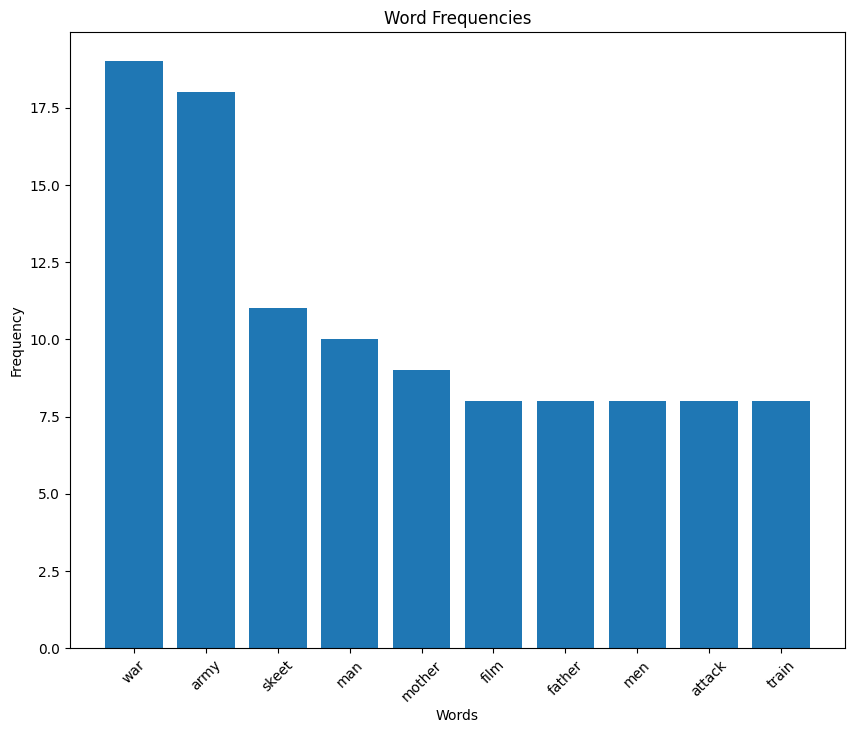

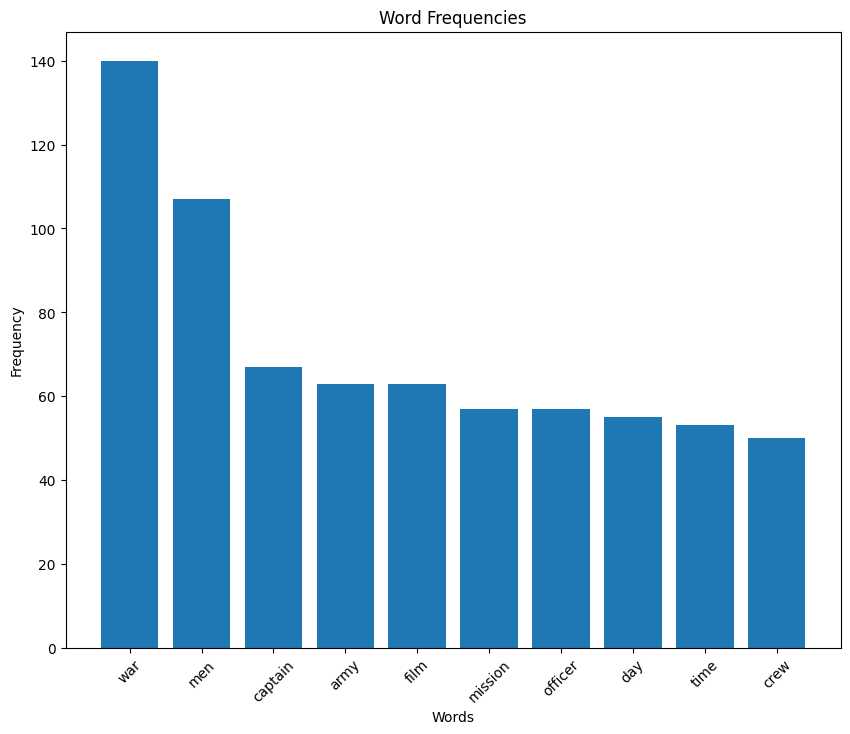

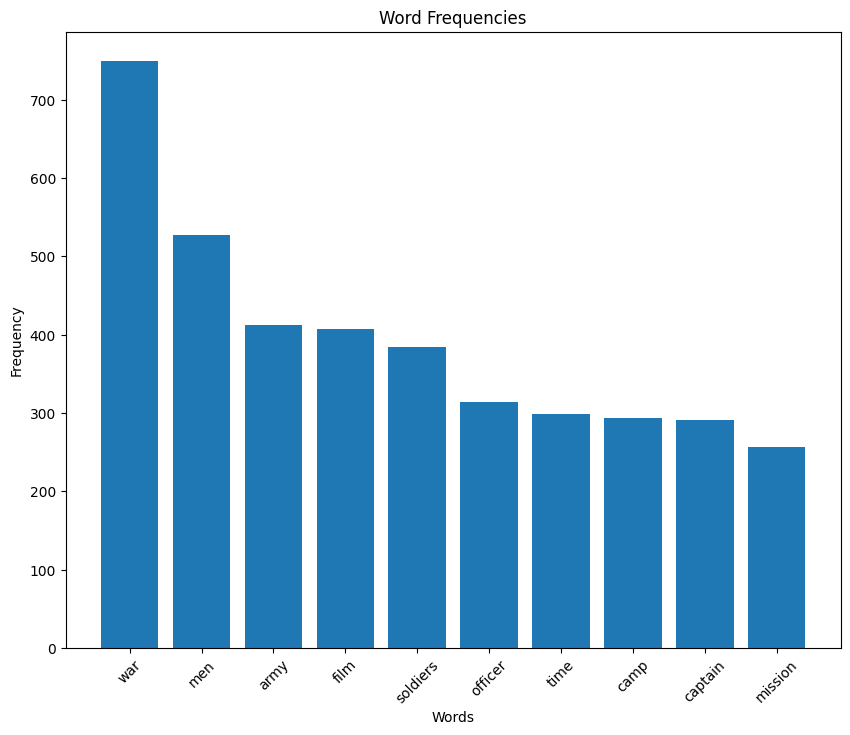

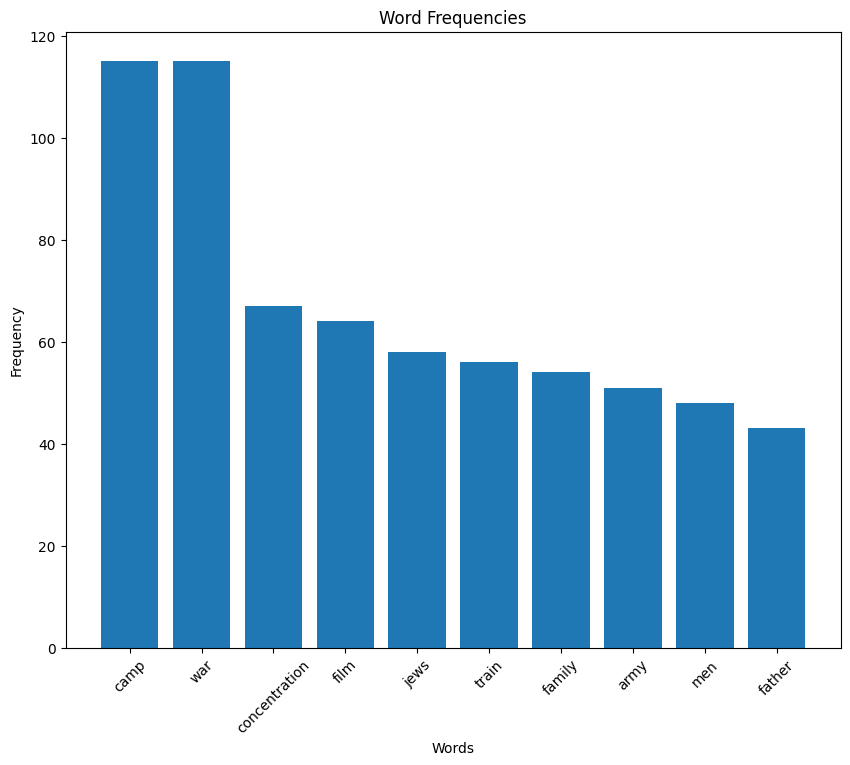

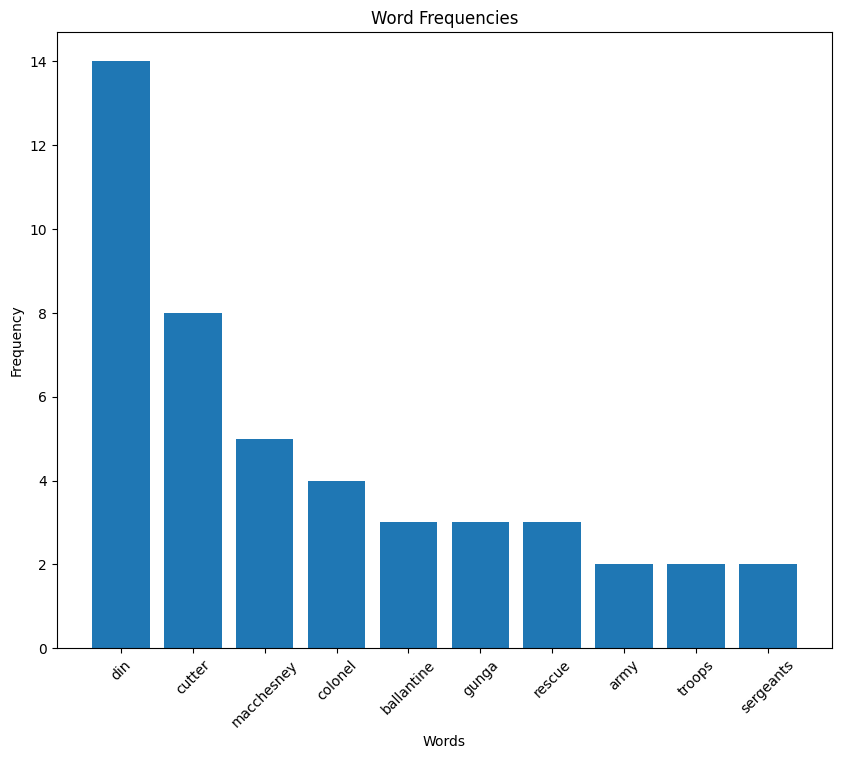

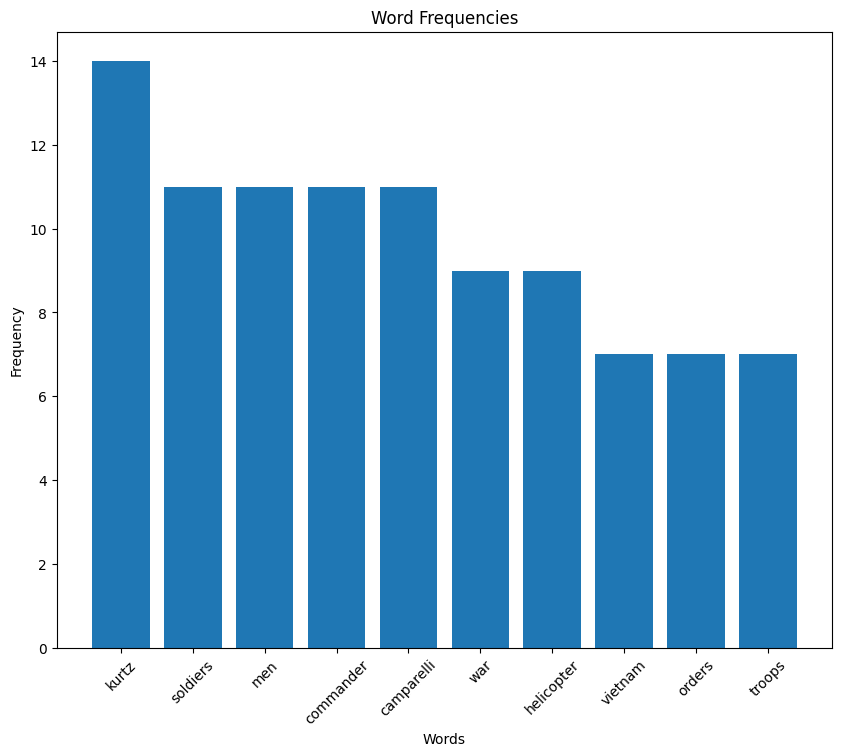

In [100]:
# We'll plot the 10 most common words for simplicity
periods = [fw_freq, sw_freq, cw_freq, h_freq, i_freq, v_freq]

for i in periods:
    top_items = i.most_common(10)

    # Split the items into words and counts
    words, counts = zip(*top_items)

    plt.figure(figsize=(10, 8))
    plt.bar(words, counts)
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.title('Word Frequencies')
    plt.xticks(rotation=45)  # Rotate the x labels to show them better
    plt.show()